In [ ]:
from dataset import (
    BuildingDataset,
    show_segmentation,
    data_loaders,
    show_segmentation_v2,
    MiyazakiDataset,
    get_transform,
)
from model import ModelConfig, new_model, TwoMLPRegression
from dataset import NUMBER_OF_CLASSES
import dataset
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torch
import logging

logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [ ]:
miyazaki_dataset = MiyazakiDataset(
    "datasets/miyazaki/jpn", transforms=get_transform(True)
)
# miyazaki_data = [d for d in miyazaki_dataset]
miyazaki_data = [miyazaki_dataset[i] for i in range(3)]

for sample in miyazaki_data[:10]:
    img, pred_masks, boxes = sample[0], sample[1]["masks"], sample[1]["boxes"]
    height_labels = [str(h.item()) for h in sample[1]["labels"]]
    show_segmentation(img, pred_masks, boxes, height_labels)

Min:  tensor(0, dtype=torch.uint8) Max:  tensor(1, dtype=torch.uint8)
Quantile 0.25: 6.0
Quantile 0.5: 12.0
Quantile 0.75: 21.0
Quantile 0.95: 25.199999999999996
Quantile 0.99: 93.0


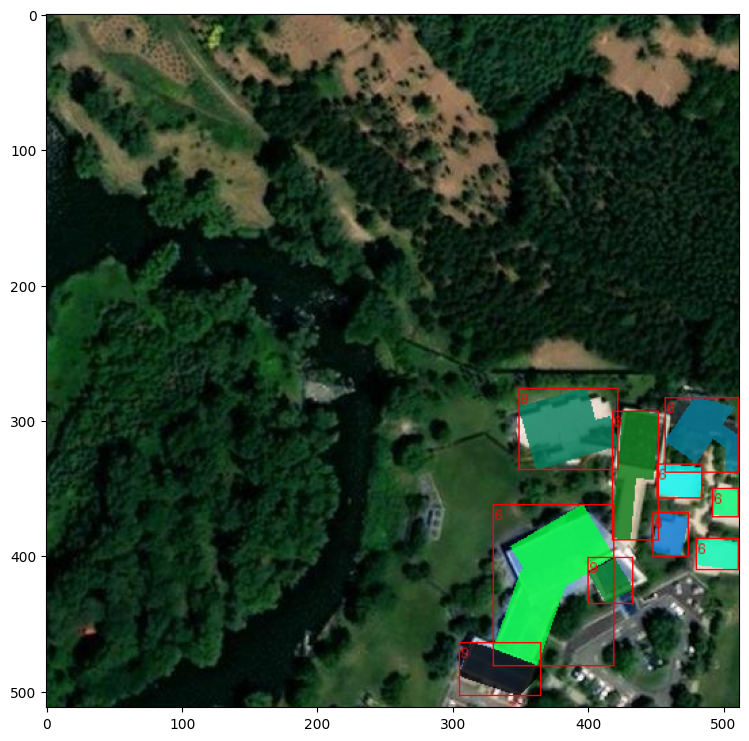

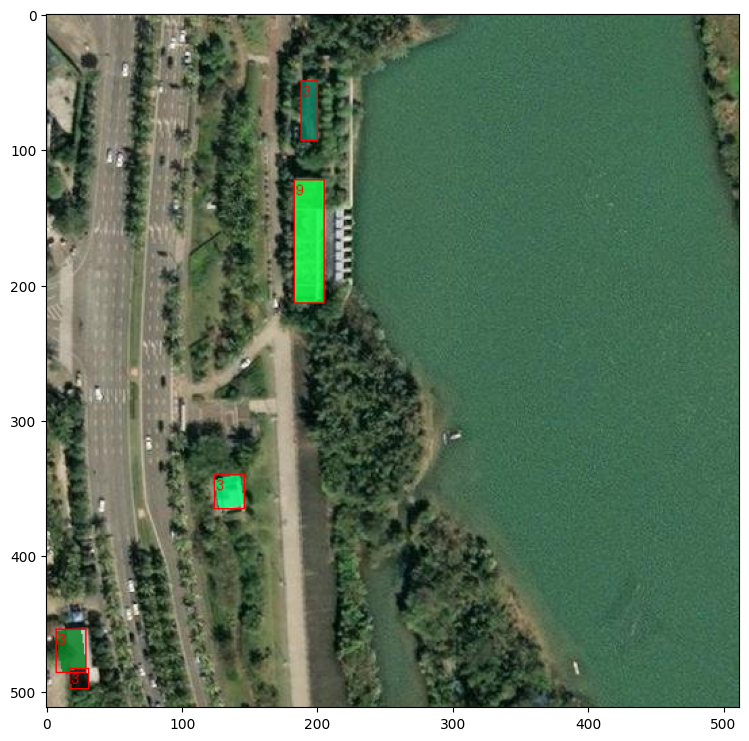

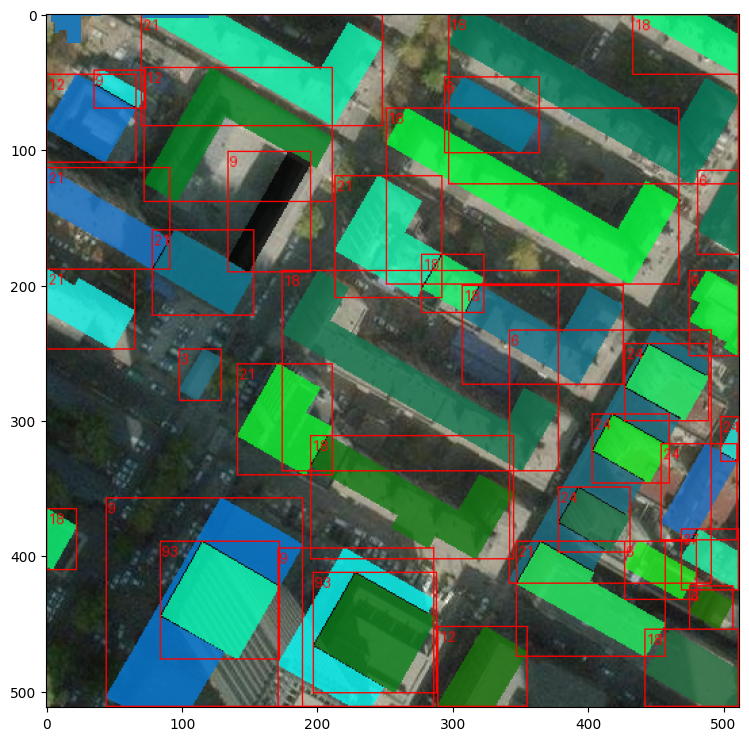

In [16]:
# Load data for exploration.
dataset_expl = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
)

# data = [d for d in dataset_expl]
data = [dataset_expl[i] for i in range(3)]

for sample in data[:10]:
    img, pred_masks, boxes = sample[0], sample[1]["masks"], sample[1]["boxes"]
    height_labels = [str(h.item()) for h in sample[1]["building_heights"]]
    show_segmentation(img, pred_masks, boxes, height_labels)


def show_distribution(values, bins=None):
    print("Min: ", pred_masks.min(), "Max: ", pred_masks.max())
    for q in [0.25, 0.5, 0.75, 0.95, 0.99]:
        print(f"Quantile {q}: {np.quantile(values, q)}")

    counts, bins = np.histogram(
        values,
        bins=bins,
    )
    plt.stairs(counts, bins, fill=True)
    plt.show()


heights = [d[1]["building_heights"] for d in data]
heights = np.hstack(heights)
show_distribution(heights, [3, 6, 9, 15, 25, 40, 70, 120, 200, max(250, heights.max())])